#PROJECT

In [1]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:

url = "https://api.tfl.gov.uk/AccidentStats/2019"  
response = requests.get(url)

data = response.json()

df = pd.json_normalize(data)

df.to_csv('incidenti_tfl_2019.csv', index=False)

In [3]:
df.head()

,$type,id,lat,lon,location,date,severity,borough,casualties,vehicles
0,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345979,51.570865,-0.231959,On Edgware Road Near The Junction With north C...,2019-01-04T21:22:00Z,Slight,Barnet,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
1,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345980,51.603859,-0.187240,On Willow Way Near The Junction With Long Lane,2019-01-04T23:33:00Z,Slight,Barnet,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
2,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345981,51.512198,-0.153122,On north Audley Street Near The Junction With ...,2019-01-04T22:15:00Z,Slight,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
3,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345982,51.431480,-0.016083,On Bromley Road Near The Junction With Daneswo...,2019-01-04T18:00:00Z,Slight,Lewisham,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
4,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345983,51.473487,0.145202,On Belmont Road Near The Junction With Bedonwe...,2019-01-04T20:45:00Z,Slight,Bexley,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...


In [4]:
df.describe()

,id,lat,lon
count,50626.000000,50626.000000,50626.000000
mean,544054.000000,51.509198,-0.118897
std,185715.647807,0.067383,0.141133
min,345828.000000,51.295233,-0.509795
25%,358484.250000,51.468225,-0.200805
50%,544054.000000,51.514006,-0.114336
75%,729623.750000,51.553555,-0.035484
max,742280.000000,51.691126,0.307909


In [5]:
df.drop(columns=['$type'], inplace=True)

df['severity'] = df['severity'].map({'Slight': 1, 'Serious': 2, 'Fatal': 3})
df.head()

,id,lat,lon,location,date,severity,borough,casualties,vehicles
0,345979,51.570865,-0.231959,On Edgware Road Near The Junction With north C...,2019-01-04T21:22:00Z,1,Barnet,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
1,345980,51.603859,-0.187240,On Willow Way Near The Junction With Long Lane,2019-01-04T23:33:00Z,1,Barnet,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
2,345981,51.512198,-0.153122,On north Audley Street Near The Junction With ...,2019-01-04T22:15:00Z,1,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
3,345982,51.431480,-0.016083,On Bromley Road Near The Junction With Daneswo...,2019-01-04T18:00:00Z,1,Lewisham,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
4,345983,51.473487,0.145202,On Belmont Road Near The Junction With Bedonwe...,2019-01-04T20:45:00Z,1,Bexley,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...


Now creating a separate dataframe for casualties and one for vehicles, in order to have more readable data.

In [6]:
df_vehicles = df.copy()

if df_vehicles['vehicles'].isnull().any():
    print("Warning: Missing or invalid data detected in 'vehicles'. Dropping null values.")
    df_vehicles = df_vehicles.dropna(subset=['vehicles'])

df_vehicles = df_vehicles.explode('vehicles')

df_vehicles.drop(columns=['lat', 'lon', 'date', 'location', 'severity', 'borough', 'casualties'], inplace=True)

df_vehicles_normalized = pd.json_normalize(df_vehicles['vehicles'].values)

if '$type' in df_vehicles_normalized.columns:
    df_vehicles_normalized.drop(columns=['$type'], inplace=True)

df_vehicles = df_vehicles.reset_index(drop=True).join(df_vehicles_normalized)

df_vehicles.drop(columns=['vehicles'], inplace=True)

df_vehicles.head(30)


,id,type
0,345979,Motorcycle_500cc_Plus
1,345979,Car
2,345980,Motorcycle_50_125cc
3,345980,Car
4,345980,Car
5,345981,Car
6,345982,Motorcycle_50_125cc
7,345982,Car
8,345983,Car
9,345983,Car


In [7]:
#unique types
unique_vehicle_types = df_vehicles['type'].unique()
print(len(unique_vehicle_types))
unique_vehicle_types

15


array(['Motorcycle_500cc_Plus', 'Car', 'Motorcycle_50_125cc',
       'PedalCycle', 'Taxi', 'LightGoodsVehicle', 'BusOrCoach',
       'OtherMotorVehicle', 'Motorcycle_125_500cc', 'HeavyGoodsVehicle',
       'Motorcycle_0_50cc', 'MediumGoodsVehicle', 'AgriculturalVehicle',
       'Minibus', 'RiddenHorse'], dtype=object)

In [8]:
grouped_accidents = df_vehicles.groupby('id')['type'].apply(list).reset_index()
grouped_accidents.columns = ['id', 'vehicles_in_accident']

grouped_accidents.head(30)

,id,vehicles_in_accident
0,345828,"[Car, Car]"
1,345829,"[Car, Car]"
2,345830,"[PedalCycle, Car]"
3,345831,[Car]
4,345832,"[Car, Car]"
5,345833,"[Car, Car]"
6,345834,[Car]
7,345835,"[Car, Car, Taxi]"
8,345836,"[Car, Car]"
9,345837,"[Car, Car, Taxi]"


In [9]:

df_vehicles = df_vehicles.groupby(['id']).agg({'type': lambda x: list(x)}).reset_index()
df_vehicles['num_vehicles'] = df_vehicles['type'].apply(lambda x: len(x))
df_vehicles

,id,type,num_vehicles
0,345828,"[Car, Car]",2
1,345829,"[Car, Car]",2
2,345830,"[PedalCycle, Car]",2
3,345831,[Car],1
4,345832,"[Car, Car]",2
...,...,...,...
50621,742276,[Taxi],1
50622,742277,[PedalCycle],1
50623,742278,"[PedalCycle, Taxi]",2
50624,742279,"[PedalCycle, Taxi]",2


In [10]:
# how many unique accendent we have per tuple
unique_lists = df_vehicles['type'].apply(tuple).unique()
print(len(unique_lists))
unique_lists

306


array([('Car', 'Car'), ('PedalCycle', 'Car'), ('Car',),
       ('Car', 'Car', 'Taxi'), ('LightGoodsVehicle',), ('Taxi',),
       ('Motorcycle_125_500cc', 'Car'), ('Car', 'Taxi'),
       ('Motorcycle_50_125cc', 'Car'), ('Motorcycle_50_125cc',),
       ('Car', 'BusOrCoach'), ('Motorcycle_500cc_Plus', 'Car'),
       ('Car', 'Car', 'Car'), ('Motorcycle_500cc_Plus',),
       ('BusOrCoach', 'LightGoodsVehicle'), ('Motorcycle_0_50cc', 'Car'),
       ('Motorcycle_50_125cc', 'Taxi'), ('BusOrCoach', 'BusOrCoach'),
       ('Car', 'Car', 'Taxi', 'Taxi'), ('Car', 'LightGoodsVehicle'),
       ('PedalCycle', 'Motorcycle_50_125cc'), ('BusOrCoach',),
       ('PedalCycle', 'LightGoodsVehicle'), ('PedalCycle',),
       ('Motorcycle_50_125cc', 'LightGoodsVehicle'),
       ('Motorcycle_500cc_Plus', 'Minibus'), ('Taxi', 'Taxi'),
       ('Car', 'Car', 'LightGoodsVehicle'), ('Car', 'OtherMotorVehicle'),
       ('PedalCycle', 'Taxi'), ('LightGoodsVehicle', 'OtherMotorVehicle'),
       ('PedalCycle', 'Motorcycl

In [11]:
categories = {
    "Motorcycle": [
        "Motorcycle_0_50cc", "Motorcycle_50_125cc", 
        "Motorcycle_125_500cc", "Motorcycle_500cc_Plus"
    ],
    "Car": [
        "Car", "Taxi", "Minibus", "LightGoodsVehicle", 
        "OtherMotorVehicle", "RiddenHorse"
    ],
    "Heavy_Vehicles": [
        "BusOrCoach", "HeavyGoodsVehicle", "MediumGoodsVehicle", 
        "AgriculturalVehicle"
    ],
    "Pedalcycle": ["PedalCycle"],
    "Other": [
        
        "OtherMotorVehicle", "RiddenHorse"
    ],
}

category_mapping = {
    vehicle: category
    for category, vehicles in categories.items()
    for vehicle in vehicles
}

def replace_vehicles_with_categories(vehicle_list):
    return [category_mapping.get(vehicle, "Unknown") for vehicle in vehicle_list]

df_vehicles['type'] = df_vehicles['type'].apply(replace_vehicles_with_categories)

In [12]:
df_vehicles.head(30)

,id,type,num_vehicles
0,345828,"[Car, Car]",2
1,345829,"[Car, Car]",2
2,345830,"[Pedalcycle, Car]",2
3,345831,[Car],1
4,345832,"[Car, Car]",2
5,345833,"[Car, Car]",2
6,345834,[Car],1
7,345835,"[Car, Car, Car]",3
8,345836,"[Car, Car]",2
9,345837,"[Car, Car, Car]",3


In [13]:
df_vehicles.to_csv("vehicles.csv", index=False)
print("Data saved to 'vehicles.csv'.")

Data saved to 'vehicles.csv'.


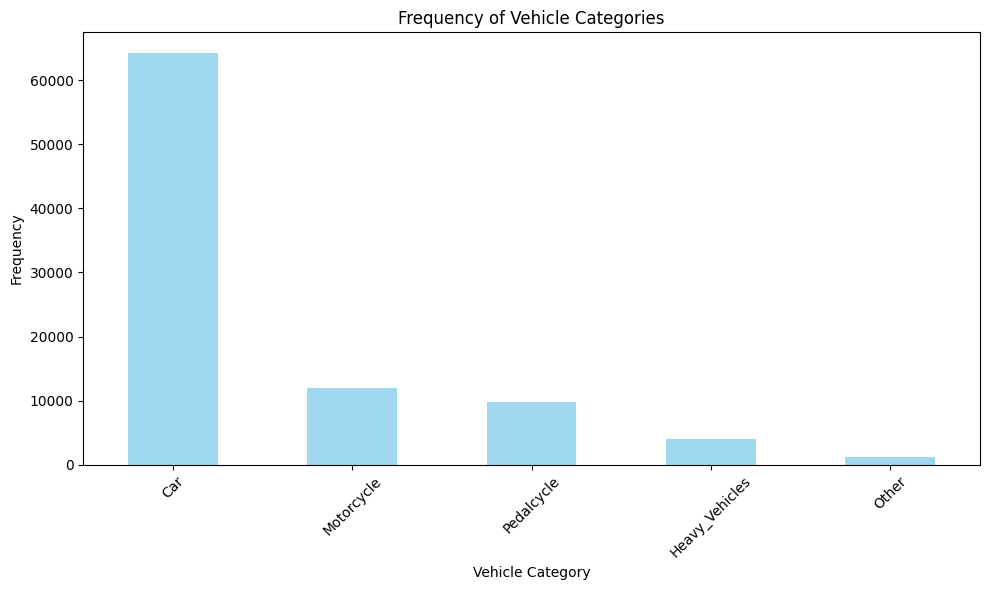

In [14]:
category_counts = df_vehicles['type'].explode().value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Frequency of Vehicle Categories')
plt.xlabel('Vehicle Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("vehicle_categories_graph.png")
plt.show()


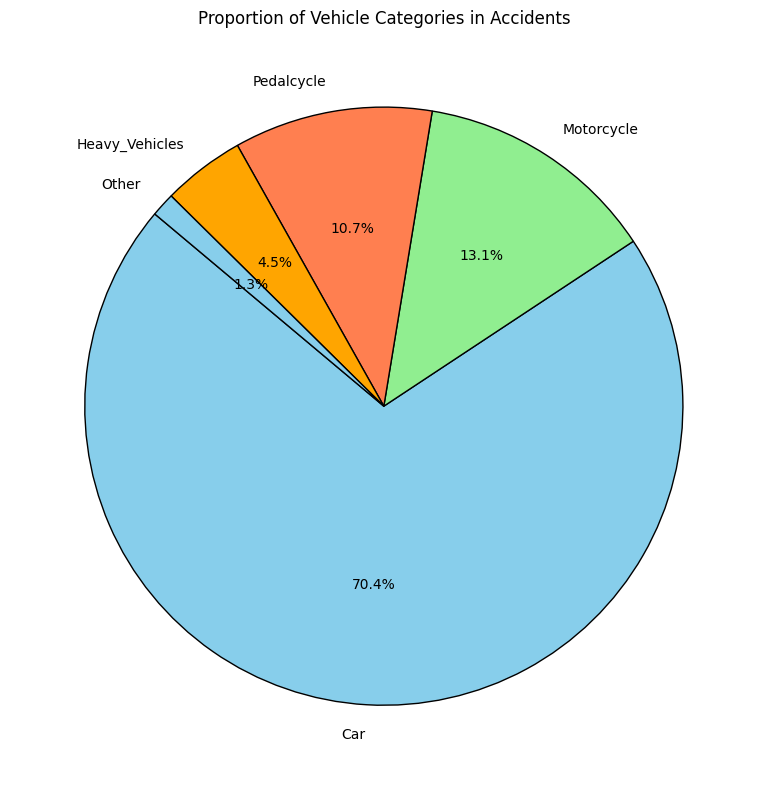

In [15]:
plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'coral', 'orange'], wedgeprops=dict(edgecolor='black'))
plt.title('Proportion of Vehicle Categories in Accidents')
plt.ylabel('')  
plt.tight_layout()
# plt.savefig("vehicle_category_proportions.png")  
plt.show()

# NOTES SECTION

## 3 OPTIONS:

* Forcasting
 * Determine out of the dataset what would happen
 * Predict accidents most likely
 * we could use past year data and compare directly with more recent data

* Corelating variables
 * Finding relationship betweetn different variables
 * expanding knowledge base to variables such as
 * Street direction, speed limit, street light, roundabout presence
 * tackle problems that normal statistics patterns or resarch can struggle with
 * Anomaly detection


* Optimization
 * Optimize the dataset
 * Most likely determining the best way to have the London transportation system
 * A simulation, hard to determine results




We could study what subjects are more at risk of severe accidents

What parts of the city are the most at risk

For insurance purposes


IDEA:
We could study the correlation between variables and accidents -> building a cost function to determine the reliability of a certain subject
Could be useful for INSURANCE COMPANIES